In [1]:
import numpy as np
import pandas as pd 

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Ml Lab Problem 01
***Question*** The dataset comprises 5,863 JPEG X-Ray images and is categorised into two types (Pneumonia and Normal), organised into three folders: train, test, and val. Each folder contains subfolders for each image type.

These chest X-ray images (anterior-posterior view) were sourced from paediatric patients aged one to five years at a renowned hospital. The X-rays were part of the routine clinical care of these patients.

As a data scientist working in the healthcare industry, your task is to develop a convolutional neural network (CNN) model that can classify medical images into their respective categories. The model should be able to accurately identify the type of medical image shown in an image, based on the image itself.

***DataSet*** https://drive.google.com/file/d/1219EeGE1XTJVXYaulynJSa3BXGsbNCLx/view?usp=sharing

## import the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Load data from the input file

In [3]:
train = '/kaggle/input/problem01/train'
val = '/kaggle/input/problem01/val'
test = '/kaggle/input/problem01/test'


## Set Up data generators with data augmentation for training

In [4]:
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

## set batch size and image dimensions

In [5]:
batch_size = 32
img_height, img_width = 150, 150

## Generate batches of augmented data

In [6]:
train_generator = train_data_generator.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Define Model

In [7]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(img_height, img_width, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(1, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Compile Model
### Check the sample and batch size for training purpose

In [8]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Samples in the training set:", train_generator.samples)
print("Samples in the training set:", val_generator.samples)
print("Batch size:", batch_size)

Samples in the training set: 5216
Samples in the training set: 16
Batch size: 32


## Model training

In [ ]:

history = cnn.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=30
)

Epoch 1/30
163/163 [==============================] - 177s 1s/step - loss: 0.4326 - accuracy: 0.8089 - val_loss: 0.8976 - val_accuracy: 0.6250
Epoch 2/30
163/163 [==============================] - 159s 972ms/step - loss: 0.2389 - accuracy: 0.9032 - val_loss: 0.4008 - val_accuracy: 0.8125
Epoch 3/30
163/163 [==============================] - 160s 979ms/step - loss: 0.2006 - accuracy: 0.9187 - val_loss: 0.4127 - val_accuracy: 0.7500
Epoch 4/30
163/163 [==============================] - 160s 977ms/step - loss: 0.1914 - accuracy: 0.9245 - val_loss: 0.6022 - val_accuracy: 0.7500
Epoch 5/30
163/163 [==============================] - 160s 980ms/step - loss: 0.1762 - accuracy: 0.9308 - val_loss: 1.3517 - val_accuracy: 0.6250
Epoch 6/30
163/163 [==============================] - 159s 975ms/step - loss: 0.1568 - accuracy: 0.9402 - val_loss: 0.4419 - val_accuracy: 0.8750
Epoch 7/30
163/163 [==============================] - 159s 976ms/step - loss: 0.1500 - accuracy: 0.9406 - val_loss: 0.2815 - va

### Generate test data

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


### Evaluate the test data

In [16]:
test_loss, test_acc = cnn.evaluate(test_generator, steps=len(test_generator))
print("test data accuracy: {:.2f}%".format(test_acc * 100))

20/20 [==============================] - 9s 441ms/step - loss: 0.3498 - accuracy: 0.9327
test data accuracy: 93.27%


### Prediction on test Data
### Print the classification report and confusion matrix

In [17]:
predictions = cnn.predict(test_generator, steps=len(test_generator))
predicted_classes = (predictions > 0.5).astype(int)

print("Classification Report:\n", classification_report(test_generator.classes, predicted_classes))
print("Confusion Matrix:\n", confusion_matrix(test_generator.classes, predicted_classes))

20/20 [==============================] - 9s 418ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.31      0.32       234
           1       0.60      0.62      0.61       390

    accuracy                           0.50       624
   macro avg       0.46      0.46      0.46       624
weighted avg       0.50      0.50      0.50       624

Confusion Matrix:
 [[ 72 162]
 [148 242]]


### Plot the inferenced Data

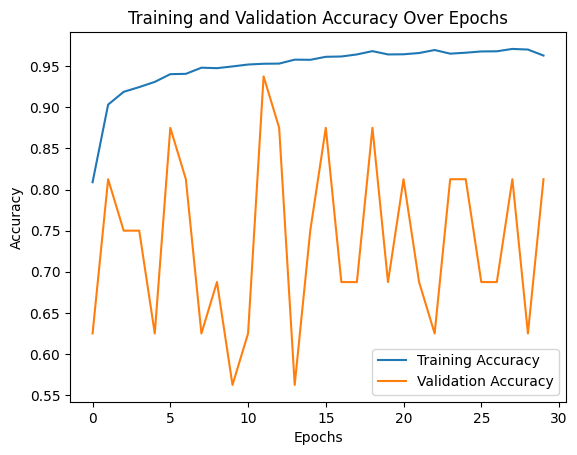

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

### here we can see our training accuracy is almost 95%

In [ ]:
print("Farhan Mahtab Mahi\nreg.no. 2018831036")